In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

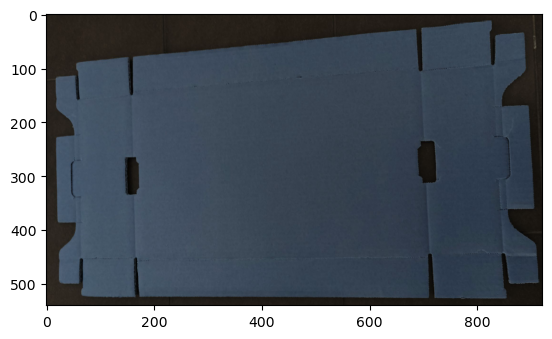

In [43]:
# reading image 
img = cv2.imread('cardboard2.png') 
plt.imshow(img)

(<Axes: title={'center': 'Blurred Image'}>,
 Text(0.5, 1.0, 'Blurred Image'))

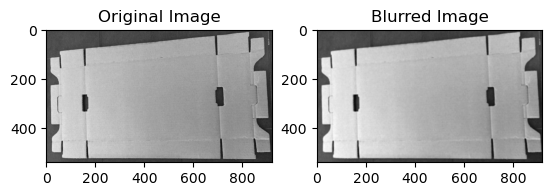

In [44]:
# Converting image into grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# Gaussian blur to remove noise and improve edge detection
blur = cv2.GaussianBlur(gray,(7,7),0)
# Show both images
plt.subplot(121), plt.imshow(gray, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(blur, cmap = 'gray'), plt.title('Blurred Image')

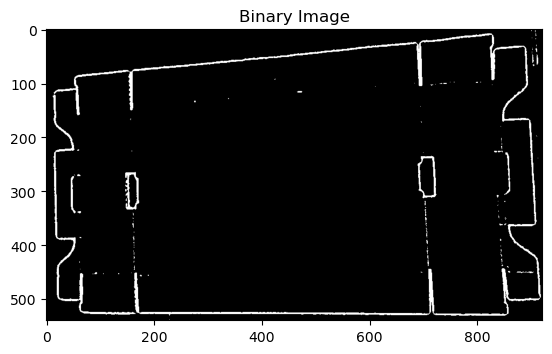

In [45]:
# Otsu's thresholding after Gaussian filtering
threshold = cv2.adaptiveThreshold(blur, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)
# visualize the binary image
plt.imshow(threshold, cmap = 'gray'), plt.title('Binary Image')
plt.show()

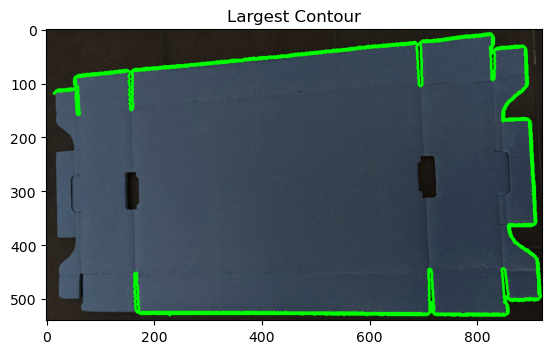

In [46]:
# using a findContours() function 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Find the largest contour in the image
largest_contour = max(contours, key=cv2.contourArea)
# Draw the largest contour on a copy of the original image
img_copy = img.copy()
cv2.drawContours(img_copy, [largest_contour], -1, (0, 255, 0), 3)
# Show the image with the largest contour drawn on it
plt.imshow(img_copy), plt.title('Largest Contour')
plt.show()